# Projet 7 : Implémentez un modèle de scoring : LightGBM

L'objectif de ce notebook est d'évaluer notre classification avec LightGBM

[LightGBM](https://datascience.eu/fr/apprentissage-automatique/quest-ce-que-la-gbm-legere/) est un algorithme de machine learning basé sur le Gradient Boosting Machine (GBM), il est rapide, distribué, avec de grandes performances et repose sur des arbres de décisions.


Paramètres : 

- (max_depth) :  contrôle la distance maximale entre le nœud racine de chaque arbre et un nœud feuille. Diminuer max_depth réduit le temps d'entraînement. 
- (num_leaves):  définit le nombre maximal de nœuds par arbre. Diminuer num_leaves réduit le temps de entraînement.

## Importation des modules

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns


## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import lightgbm as lgb

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer



## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle

## Warning
import warnings

In [ ]:
warnings.filterwarnings("ignore")

##  Importation de données

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [ ]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [ ]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

## Mise en place du modèle

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [ ]:
accuracy= []
recall =[]
roc_auc= []
precision = []

lgbmc_3=LGBMClassifier(random_state=0,scale_pos_weight=11.35)

lgbmc_3.fit(X_train_smtomek, y_train_smtomek,categorical_feature = 'auto',eval_set=(X_test_smtomek, y_test_smtomek),feature_name='auto', verbose=0)

y_pred = lgbmc_3.predict(X_test_smtomek)

accuracy.append(round(accuracy_score(y_test_smtomek, y_pred),4))
recall.append(round(recall_score(y_test_smtomek, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test_smtomek, y_pred),4))
precision.append(round(precision_score(y_test_smtomek, y_pred),4))

model_names = ['LightGBM_adjusted_weight_3']
result_df8 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df8


clf=lgbmc_3

In [ ]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, clf.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, clf.predict(X_train_smtomek))}')

Accuracy: 0.6971805794933498
Precision: 0.174275903729374
Recall: 0.7361670695675531


In [ ]:
y_pred=clf.predict(X_test_smtomek)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test_smtomek)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_smtomek, y_pred)))

LightGBM Model accuracy score: 0.6861


In [ ]:
y_pred_train = clf.predict(X_train_smtomek)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_smtomek, y_pred_train)))

Training-set accuracy score: 0.6972


In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_smtomek, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[78070 35002]
 [ 3608  6325]]

True Positives(TP) =  78070

True Negatives(TN) =  6325

False Positives(FP) =  35002

False Negatives(FN) =  3608


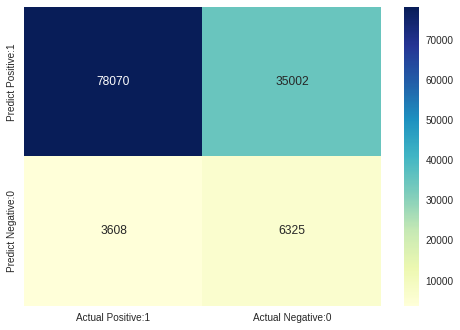

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_smtomek, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80    113072
           1       0.15      0.64      0.25      9933

    accuracy                           0.69    123005
   macro avg       0.55      0.66      0.52    123005
weighted avg       0.89      0.69      0.76    123005



In [ ]:
from sklearn import metrics

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.6636056803093817

In [ ]:
y_prob = clf.predict_proba(X_test_smtomek)[:,1] 

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7210363614083326

Text(0.5, 0, 'False Positive Rate')

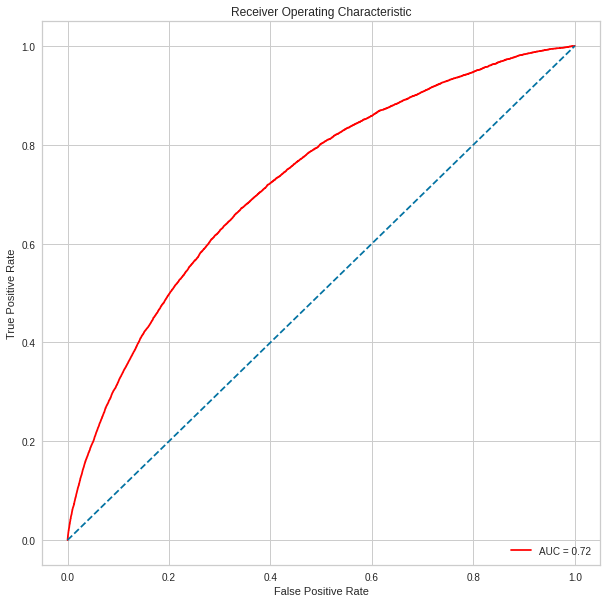

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Le score AUC est bon et relève d'un modèle dans l'ensemble performant et c'est la raison pour laquelle il est souvent utilisé dans les compétitions Kaggle.

## Feature Importance

In [ ]:
pd.set_option('display.max_columns', None)
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
0,100002,1,Cash loans,M,0,202500.0,406597.5,Unaccompanied,working,low_educ,not_married,0.018801,-9461,-637,NaN,other,1.0,2,2,10,0,0.0149,2.0,1,1.0,Closed,-874.00,108131.945625,NaN,NaN,NaN,NaN,-20.421053,0.0,9251.775,179055.00,0.00,-606.000000,24.000000,365243.0,-25.000000,-17.000000,Approved,XAP,New,15.000000,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,Family,working,high_educ,married,0.003541,-16765,-1188,NaN,other,2.0,1,1,11,0,0.0714,0.0,1,0.0,Closed,-1400.75,254350.125000,NaN,NaN,NaN,NaN,-7.000000,0.0,56553.990,484191.00,3442.50,-1305.000000,10.000000,365243.0,-1054.333333,-1047.333333,Approved,XAP,Refreshed,4.909091,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,Unaccompanied,working,low_educ,not_married,0.010032,-19046,-225,26.0,other,1.0,2,2,9,0,NaN,0.0,0,0.0,Closed,-867.00,94518.900000,NaN,NaN,NaN,NaN,-3.000000,0.0,5357.250,20106.00,4860.00,-815.000000,4.000000,365243.0,-724.000000,-714.000000,Approved,XAP,New,0.000000,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,Unaccompanied,working,low_educ,married,0.008019,-19005,-3039,NaN,other,2.0,2,2,17,0,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,-19.375000,0.0,23651.175,291695.50,34840.17,-272.444444,23.000000,365243.0,182477.500000,182481.750000,Approved,XAP,Repeater,8.650000,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,Unaccompanied,working,low_educ,not_married,0.028663,-19932,-3038,NaN,other,1.0,2,2,11,1,NaN,0.0,0,0.0,Closed,-1149.00,146250.000000,NaN,NaN,NaN,NaN,-6.320000,0.0,12278.805,166638.75,3390.75,-1222.833333,20.666667,365243.0,72136.200000,72143.800000,Approved,XAP,Repeater,11.666667,0.0


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
pd.set_option('display.max_columns', None)
dataset.sample(1000)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
20489,123898,0,Cash loans,F,0,112500.0,814041.0,Unaccompanied,working,low_educ,married,0.006671,-22813,365243,NaN,NaN,2.0,2,2,16,0,0.0146,0.0,0,6.0,Closed,-1455.333333,9.166950e+04,0.0,419.895,0.0,0.0,-7.870370,-826.1800,10612.90500,152494.50,NaN,-785.583333,24.666667,291626.0,145739.800000,218968.800000,Approved,XAP,Repeater,18.133333,0.000000
107031,224176,0,Cash loans,F,1,135000.0,1288350.0,Unaccompanied,working,low_educ,married,0.018634,-10690,-2505,1.0,other,3.0,2,2,11,0,0.0614,0.0,1,0.0,Active,-603.000000,5.064894e+05,NaN,NaN,NaN,NaN,-9.166667,0.0000,28542.80250,411313.50,12838.50,-1147.500000,24.000000,365243.0,-667.000000,-662.000000,Approved,XAP,New,15.833333,0.000000
302533,450505,0,Cash loans,F,0,67500.0,152820.0,Unaccompanied,working,low_educ,other,0.015221,-21157,365243,NaN,NaN,1.0,2,2,8,0,NaN,0.0,1,1.0,Active,-473.000000,1.712642e+05,NaN,NaN,NaN,NaN,NaN,NaN,7972.74000,70057.50,4500.00,-556.500000,20.000000,365243.0,-2322.000000,-2315.000000,Canceled,XAP,Refreshed,NaN,NaN
323,100371,0,Cash loans,F,1,450000.0,808650.0,Unaccompanied,working,high_educ,married,0.072508,-14768,-426,1.0,other,3.0,1,1,13,0,0.6093,0.0,0,0.0,Active,-1150.000000,1.324191e+06,0.0,NaN,0.0,0.0,-13.000000,34083.6225,19928.98125,167400.00,7278.75,-319.166667,13.500000,365243.0,121547.666667,121552.000000,Approved,XAP,Repeater,5.500000,0.000000
240922,378962,0,Cash loans,F,2,360000.0,532584.0,Unaccompanied,working,high_educ,other,0.018634,-13275,-4845,2.0,other,3.0,2,2,16,0,NaN,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.666667,-1408.0000,37654.86375,378126.00,20767.50,-391.214286,20.250000,365243.0,182298.000000,182301.500000,Refused,XAP,Repeater,14.888889,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66981,177668,0,Cash loans,M,0,112500.0,797557.5,Unaccompanied,working,low_educ,married,0.035792,-22781,365243,NaN,NaN,2.0,2,2,11,0,NaN,0.0,1,1.0,Closed,-1370.823529,2.148183e+05,NaN,NaN,NaN,NaN,-19.500000,0.0000,14232.69000,119925.00,NaN,-492.000000,12.000000,365243.0,-372.000000,-365.000000,Approved,XAP,New,6.200000,0.000000
131791,252849,0,Cash loans,F,0,103500.0,819432.0,Unaccompanied,working,low_educ,married,0.007020,-13484,-1184,NaN,other,2.0,2,2,9,0,NaN,1.0,1,6.0,Closed,-1264.333333,6.785739e+04,0.0,NaN,0.0,0.0,-11.833333,-669.9325,14719.35150,200091.90,1001.25,-615.666667,21.000000,365243.0,103679.428571,103685.714286,Approved,XAP,Repeater,13.342857,0.142857
103774,220442,0,Cash loans,F,1,117000.0,450000.0,Children,working,high_educ,married,0.019689,-12207,-4195,NaN,other,3.0,2,2,18,0,NaN,1.0,1,0.0,Closed,-1800.000000,6.487526e+05,NaN,NaN,NaN,NaN,NaN,NaN,5616.18000,27913.50,90000.00,-1899.000000,6.000000,365243.0,-1706.000000,-1703.000000,Approved,XAP,Refreshed,NaN,NaN
1094,101273,0,Cash loans,M,0,45000.0,269550.0,Unaccompanied,working,low_educ,married,0.028663,-21246,365243,20.0,NaN,2.0,2,2,8,0,NaN,0.0,1,0.0,Closed,-686.000000,3.680100e+04,NaN,NaN,NaN,NaN,NaN,NaN,4897.24500,36416.25,6102.75,-2021.833333,9.333333,365243.0,-1737.833333,-1712.500000,Approved,XAP,Repeater,NaN,NaN


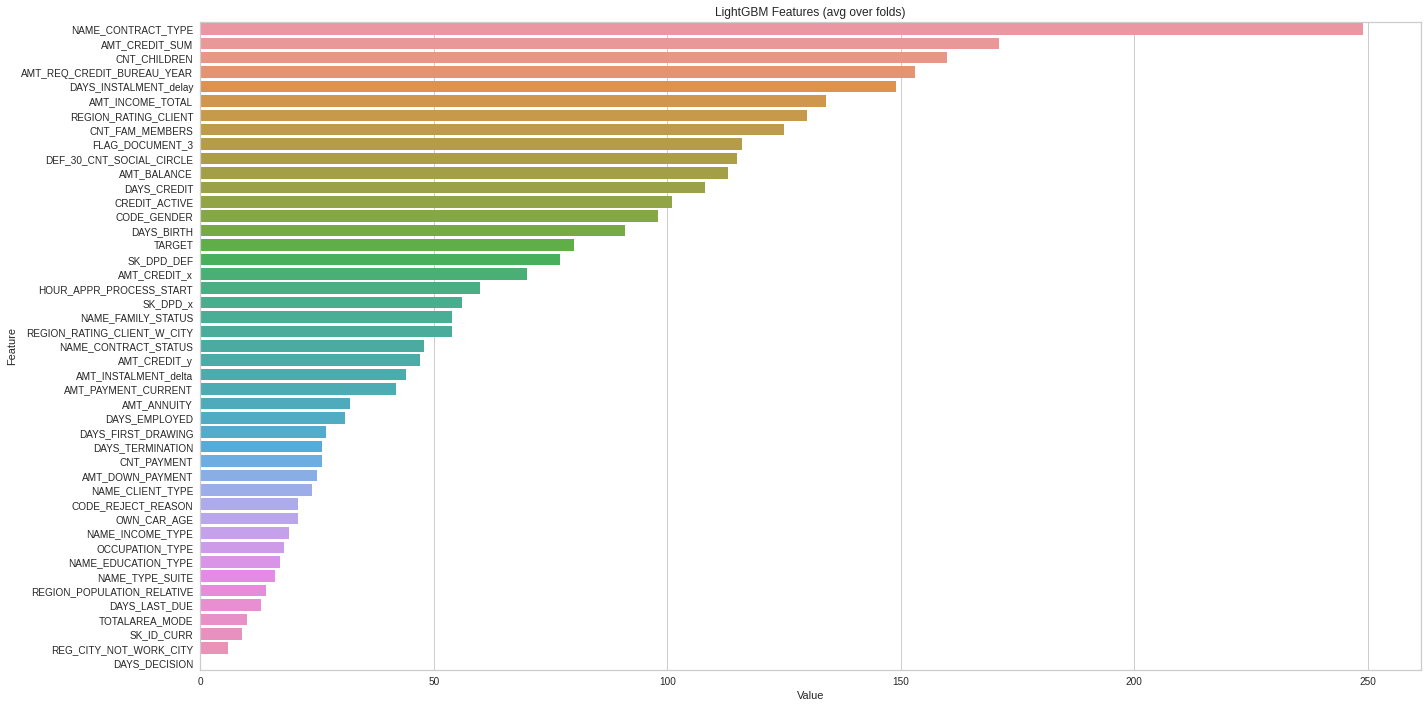

<Figure size 576x396 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, dataset.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,dataset.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [ ]:
#pickle_out = open(PATH + "LightGBMmodel.pkl", "wb")
#pickle.dump(clf, pickle_out)
#pickle_out.close()

In [ ]:
prediction = clf.predict(X_test_smtomek)
print(prediction)

[1 1 0 ... 0 0 0]


In [ ]:
dataset['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [ ]:
X_test_smtomek

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,0.0,0.10,-0.184728,-0.444552,0.531771,0.251927,0.0,0.0,1.0,1.0,-0.25,1.0,0.00000,0.0,0.0,-0.5,1.475043,-0.562495,0.0000,0.00000,0.0,0.0,0.307228,0.000000,-0.062753,0.026205,-0.461520,0.717072,-0.666667,0.00,2.988648,2.156286,0.076923,0.0,0.0,0.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0
1,0.0,0.85,0.301779,-0.444552,-0.975603,-0.071400,-3.0,-1.0,1.0,1.0,0.50,1.0,0.00000,1.0,0.0,0.5,0.062571,2.152556,0.0000,0.00000,0.0,0.0,0.779955,0.000000,2.667929,6.135223,2.615385,0.752925,2.666667,0.00,-0.001710,-0.351820,3.174825,0.0,0.0,0.0,6.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0
2,1.0,-0.75,-0.424879,0.668864,-0.142385,0.314402,-1.0,1.0,0.0,0.0,0.00,0.0,0.00000,0.0,0.0,-0.5,-1.319059,1.108952,0.0000,0.00000,0.0,0.0,1.071934,0.000000,-0.255910,-0.188678,0.457436,-0.719808,0.000000,0.00,1.488417,0.898013,0.076923,0.0,0.0,0.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,7.0,0.0
3,2.0,-0.55,-0.115931,-0.002626,0.600827,0.154564,0.0,2.0,0.0,0.0,-0.50,0.0,3.21875,0.0,0.0,0.0,1.611028,-0.207283,0.0000,0.00000,0.0,0.0,-0.398936,-249.283421,-0.141069,1.467761,-0.461538,0.498118,3.000000,0.00,-0.000597,-0.350839,0.153846,0.0,0.0,0.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,7.0,0.0
4,0.0,-0.40,0.301779,0.000000,-0.518539,-3.365517,0.0,0.0,0.0,0.0,1.00,0.0,0.00000,0.0,0.0,0.5,-1.348656,0.077758,0.0000,0.00000,0.0,0.0,0.000000,0.000000,-0.625360,-0.020341,0.909538,-1.493260,2.333333,0.00,-0.014661,-0.362477,0.000000,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,1.0,2.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,1.0,1.35,-0.071287,0.000000,0.432667,-0.844219,0.0,1.0,0.0,0.0,0.75,1.0,0.00000,0.0,0.0,0.5,0.552170,-0.422040,783788.7975,32468.65875,0.0,0.0,-0.462930,0.000000,0.545661,1.415760,-0.193744,-0.658850,0.404040,-45722.75,0.364994,-0.044233,1.574661,0.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,2.0
123001,1.0,-0.15,-0.423367,-0.535134,-0.138663,-2.923732,0.0,1.0,0.0,0.0,-0.25,0.0,-11.68750,0.0,0.0,0.5,-0.437553,-0.173235,0.0000,0.00000,0.0,0.0,-0.612558,30529.838077,1.087781,2.025128,0.030769,0.080055,1.259259,0.00,0.991696,0.481414,2.284900,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1.0,1.0,0.0,7.0,2.0
123002,0.0,2.25,0.051153,1.467010,-0.859959,148.663692,0.0,-1.0,-1.0,-1.0,-0.25,0.0,-10.53125,0.0,-1.0,0.5,1.310260,0.197850,0.0000,0.00000,0.0,0.0,-0.179403,5625.000000,0.852402,1.053033,-0.461538,0.663017,0.555556,0.00,1.492991,0.901832,1.230769,0.0,1.0,0.0,6.0,1.0,1.0,1.0,2.0,0.0,0.0,7.0,0.0
123003,0.0,-0.65,-0.533642,0.074824,-1.054032,148.663692,0.0,-1.0,1.0,1.0,0.50,0.0,33.93750,0.0,-1.0,-0.5,1.254266,0.024341,0.0000,0.00000,0.0,0.0,0.000000,0.000000,-0.163145,-0.171687,0.849231,-2.821758,-0.222222,0.00,-0.020380,-0.367479,0.000000,0.0,0.0,0.0,6.0,1.0,1.0,2.0,2.0,0.0,0.0,7.0,0.0
